In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

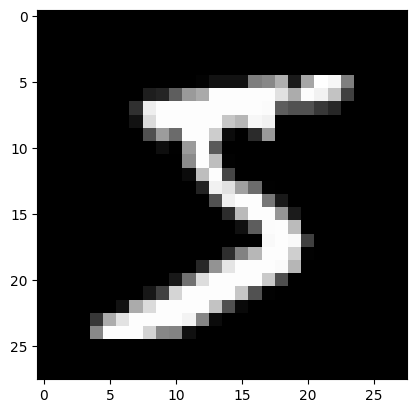

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

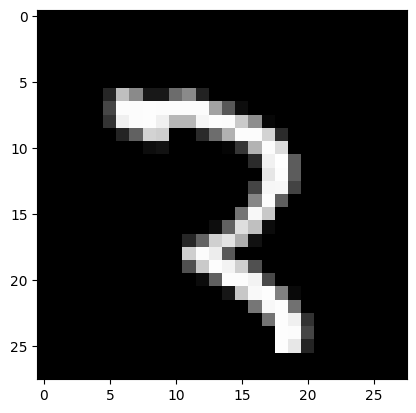

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
test = keras.Sequential()
test.add(layers.Input(shape=(28,28,1)))
test.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
test.add(layers.MaxPool2D(pool_size=(2,2)))
test.add(layers.Flatten())
test.add(layers.Dense(20,activation='relu'))
test.add(layers.Dense(10,activation='softmax'))

In [ ]:
test.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
test.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64,
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 26s 26ms/step - loss: 0.2560 - accuracy: 0.9264 - val_loss: 0.0979 - val_accuracy: 0.9708
Epoch 2/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0895 - accuracy: 0.9739 - val_loss: 0.0788 - val_accuracy: 0.9745
Epoch 3/5
938/938 [==============================] - 24s 26ms/step - loss: 0.0646 - accuracy: 0.9809 - val_loss: 0.0585 - val_accuracy: 0.9808
Epoch 4/5
938/938 [==============================] - 24s 25ms/step - loss: 0.0532 - accuracy: 0.9840 - val_loss: 0.0599 - val_accuracy: 0.9807
Epoch 5/5
938/938 [==============================] - 25s 27ms/step - loss: 0.0435 - accuracy: 0.9871 - val_loss: 0.0528 - val_accuracy: 0.9815


In [ ]:
metrics = pd.DataFrame(test.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.255979,0.926400,0.097945,0.9708
1,0.089502,0.973850,0.078772,0.9745
2,0.064646,0.980883,0.058508,0.9808
3,0.053206,0.983950,0.059873,0.9807
4,0.043492,0.987083,0.052768,0.9815


Text(0.5, 1.0, 'Anish Raj P\n212222230010')

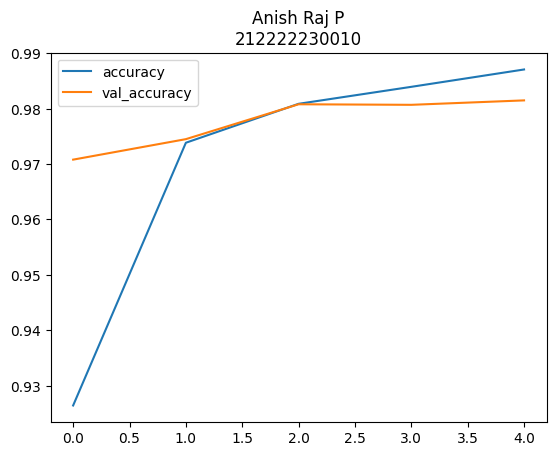

In [ ]:
metrics[['accuracy','val_accuracy']].plot()
plt.title("Anish Raj P\n212222230010")

Text(0.5, 1.0, 'Anish Raj P\n212222230010')

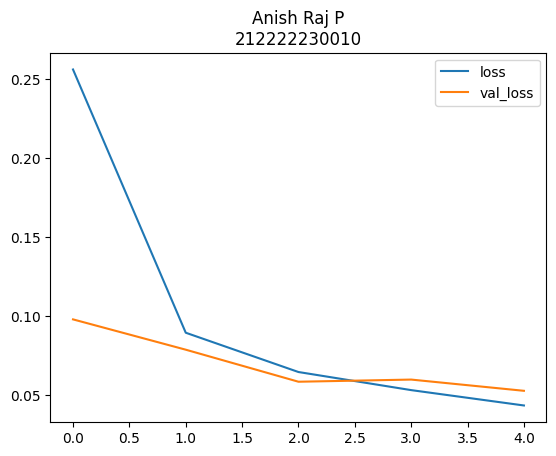

In [ ]:
metrics[['loss','val_loss']].plot()
plt.title("Anish Raj P\n212222230010")

In [ ]:
x_test_predictions = np.argmax(test.predict(X_test_scaled), axis=1)

313/313 [==============================] - 3s 8ms/step


In [ ]:
print("Anish Raj P\n212222230010")
print(confusion_matrix(y_test,x_test_predictions))

Anish Raj P
212222230010
[[ 970    0    1    0    0    4    2    1    1    1]
 [   0 1131    2    1    0    0    0    0    1    0]
 [   1    2 1014    2    1    0    2    5    5    0]
 [   0    0    2  998    0    5    0    0    4    1]
 [   3    2    3    0  953    0    6    0    4   11]
 [   1    0    1    8    0  877    4    0    1    0]
 [   5    2    0    0    1    1  946    0    3    0]
 [   1    5   15    8    1    0    0  992    3    3]
 [   3    0    6    2    0    0    2    2  958    1]
 [   1    4    0    5    6    7    0    3    7  976]]


In [ ]:
print("Anish Raj P\n212222230010")
print(classification_report(y_test,x_test_predictions))

Anish Raj P
212222230010
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.99      0.98      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.99      0.96      0.98      1028
           8       0.97      0.98      0.98       974
           9       0.98      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [ ]:
img = image.load_img('five.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('five.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    test.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(x_single_prediction)

[5]


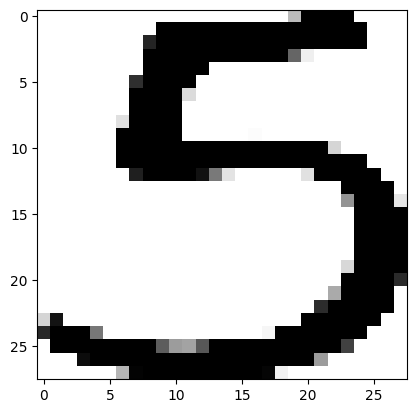

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    test.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)

[5]
